<a href="https://colab.research.google.com/github/kaleem500bc/Simple_GAN-torch-and-tensorflow/blob/master/Simple_GAN%20torch%20and%20tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchvision
!pip install torch
!pip install torchviz
!pip install tensorboard

%load_ext tensorboard

In [ ]:
#import libs
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torchvision
from torch.utils.tensorboard import SummaryWriter
# from torch.auto_grad import Variable
import torch.nn.functional as F
from torchviz import make_dot 
from torch.autograd import Variable


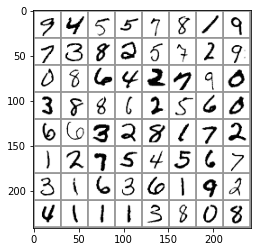

In [ ]:
#Download dataset = training and test set
   #define a transform to normalize the data
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))
])
train_set = datasets.MNIST('MNIST_data/', download = True, train=True, 
                           transform = transform)
trainloader = torch.utils.data.DataLoader(train_set,batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()
# tempImg = images
# fig = plt.figure()
# fig.add_subplot(1,1,1)
# tempImage = images[0].numpy().reshape((28,28))
# plt.imshow(tempImage)
# plt.show()
# images.shape




def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))



img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)





In [ ]:
tensorboard --logdir=runs

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.5,),(0.5,))])

fake_dataset = torchvision.datasets.FakeData(60000,(1,100),1,transform)
fake_dataloader = torch.utils.data.DataLoader(fake_dataset,64)
fakeDataIter = iter(fake_dataloader)

noise = torch.randn(64,100)





In [ ]:
# noiseInput = torch.randn(64,100).to("cuda")
tfdata = torch.utils.data.DataLoader(fake_dataset,128)
itfdata = iter(tfdata)

In [ ]:
class GeneratorM(nn.Module):
    def __init__(self):
        super(GeneratorM, self).__init__()
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( 1, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),
            # state size. (64*8) x 4 x 4
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),
            # state size. (64*4) x 8 x 8
            nn.ConvTranspose2d( 64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),
            # state size. (64*2) x 16 x 16
            nn.ConvTranspose2d( 64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # state size. (64) x 32 x 32
            nn.ConvTranspose2d( 64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (3) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)




class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is 3 x 64 x 64
            nn.Conv2d(1, 64, 2, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. 64 x 32 x 32
            nn.Conv2d(64, 64 * 2, 2, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (64*2) x 16 x 16
            nn.Conv2d(64 * 2, 64 * 4, 2, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (64*4) x 8 x 8
            nn.Conv2d(64 * 4, 64 * 8, 2, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (64*8) x 4 x 4
            nn.Conv2d(64 * 8, 1, 2, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


netG = GeneratorM().to("cuda")
netD = Discriminator().to("cuda")



In [ ]:
criterionN = nn.BCELoss()

optimD = torch.optim.Adam(netD.parameters(),lr = 0.0002)
optimG = torch.optim.Adam(netG.parameters(),lr=0.0002)




In [ ]:
# noiseInput,flabel = fakeDataIter.next()
# # noiseInput = noiseInput.view(flabel.shape[0],-1)

# print(noiseInput.shape)

# print(noiseInput[0])

# rImg,label = dataiter.next()

# rImg.shape
# netD(rImg.float().to("cuda"))


In [ ]:
ifakedata = torch.utils.data.DataLoader(fake_dataset,64)

for rImg, rClas in dataiter:
    # r = rImg.view((rImg.shape[0],784))
    rImg = rImg.to("cuda")
    rClass = torch.ones_like(rClas)
    fClass = torch.zeros_like(rClas)
    rClass = rClass.to("cuda")
    fClass = fClass.to("cuda")
    noiseInput,flabel = fakeDataIter.next()
    # noiseInput = noiseInput.view(flabel.shape[0],-1)
    # noiseInput = torch.unsqueeze(noiseInput,1)
    noiseInput = noiseInput.to("cuda")
    #generator output
    fImg = netG(noiseInput)
    fImg = fImg.to("cuda")
    #discriminator training
    print(rImg.shape)
    print(fImg.shape)
    break
    # dROutput = netD(rImg)
    # dFOutput = netD(fImg)
    # dROutput = dROutput.view(dROutput.shape[0]).float()
    # rClass = rClass.float()
    # dFOutput = dFOutput.float()
    # fClass = fClass.float()
    # dTotalLoss = criterionN(dROutput,rClass)
    # optimD.zero_grad()
    # dTotalLoss.backward()
    # optimD.step()


    # #generator training
    # gTrain= netD(fImg)
    # rClass2=  torch.ones_like(rClass).float()
    # gLossD = criterionN(gTrain,rClass2)
    # # make_dot(gLossD).render("attached",format="png")
    # optimG.zero_grad()
    # gLossD.backward()
    # optimG.step()







torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 64, 1648])


In [ ]:
m = nn.ConvTranspose2d(1, 1, (1, 1))
input = torch.randn(2, 1,1,1)
output = m(input)
print(input.shape)
print(input)
print(output.shape)
print(output)




torch.Size([2, 1, 1, 1])
tensor([[[[ 0.0465]]],


        [[[-0.7118]]]])
torch.Size([2, 1, 1, 1])
tensor([[[[ 0.3811]]],


        [[[-0.1929]]]], grad_fn=<SlowConvTranspose2DBackward>)


Implement GAN with Tensorflow

In [ ]:
!pip install -q imageio

In [ ]:
import tensorflow as tf

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
(train_dataset,train_labels), (_,_) = tf.keras.datasets.mnist.load_data()

train_dataset_reshape = train_dataset.reshape(train_dataset.shape[0],28,28,1).astype('float32')

train_dataset_normalize = (train_dataset-127.5)/127.5 #range [-1,1]

In [ ]:

train_dataset_shuffled_batched = tf.data.Dataset.from_tensor_slices(train_dataset_normalize).shuffle(60000).batch(256)


In [ ]:
#Generator

def netG():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256,input_shape= (100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Reshape((7,7,256)))

  model.add(layers.Conv2DTranspose(128,(5,5),strides=(1,1), padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(1,(5,5),strides=(2,2),padding='same'))
  return model





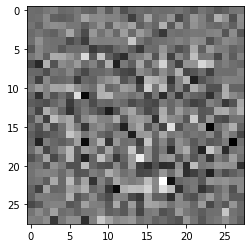

In [ ]:
g_Model = netG()

noise = tf.random.normal([1,100])

generated_image = g_Model(noise, training=False)
plt.imshow(generated_image[0,:,:,0],cmap='gray')


In [ ]:
#Discriminator

def netD():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64,(5,5),strides=(2,2), padding='same', input_shape= [28,28,1]))

  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128,(5,5),strides=(2,2), padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1))
  return model

d_Model = netD()

In [ ]:

criterion = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
#discriminator loss

def d_loss(r_output, f_output):
  r_loss = criterion(tf.ones_like(r_output), r_output)
  f_loss = criterion(tf.zeros_like(f_output),f_output)
  total_loss = r_loss+f_loss
  return total_loss


In [ ]:
#generator loss

def g_loss(f_output):
  loss = criterion(tf.ones_like(f_output), f_output)
  return loss
  

In [ ]:
g_optimizer = tf.keras.optimizers.Adam(1e-4)
d_optimizer = tf.keras.optimizers.Adam(1e-4)



In [ ]:
#training

epochs = 50
noise_dim = 100
num_examples = 16
seed = tf.random.normal([num_examples, noise_dim])


In [ ]:

def training_step(images):
  noise = tf.random.normal([256,noise_dim])
  with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
    g_images = g_Model(noise, training=True)

    r_output =  d_Model(images, training=True)
    f_output = d_Model(g_images,training=True)

    generator_loss = g_loss(f_output)
    disc_loss = d_loss(r_output,f_output)
  
  gradients_generator = g_tape.gradient(generator_loss, g_Model.trainable_variables)
  g_optimizer.apply_gradients(zip(gradients_generator,g_Model.trainable_variables))

  gradients_disc = d_tape.gradient(disc_loss, d_Model.trainable_variables)
  d_optimizer.apply_gradients(zip(gradients_disc, d_Model.trainable_variables))




In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    for image_batch in dataset:
    #   print(image_batch.shape)
    #   break
    # break
      training_step(image_batch)
    
    display.clear_output(wait=True)
    generate_and_save_images(g_Model, epoch+1,seed)
  
  display.clear_output(wait=True)
  generate_and_save_images(g_Model,epochs,seed)

In [ ]:
for i in train_dataset_shuffled_batched:
  print(i.shape
  break

(256, 28, 28)
tf.Tensor(
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.], shape=(28,), dtype=float64)


In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

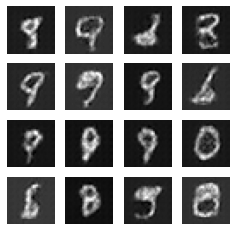

In [ ]:
train(train_dataset_shuffled_batched, 50)

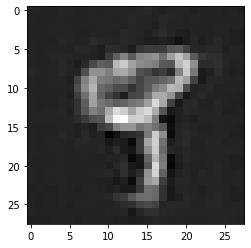

In [ ]:
noise = tf.random.normal([1,100])

generated_image = g_Model(noise, training=False)
plt.imshow(generated_image[0,:,:,0],cmap='gray')

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard()

In [ ]:
%tensorboard --logdir logs

Pytorch GAN

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets


In [ ]:


class netG(nn.Module):
  def __init__(self):
    super().__init__()

    self.c1 = nn.ConvTranspose2d(1,16,3)
    self.c2 = nn.ConvTranspose2d(16,32,5)
    self.c3 = nn.ConvTranspose2d(32,64,5)
    self.c4 = nn.ConvTranspose2d(64,128,5)
    self.c5 = nn.ConvTranspose2d(128,1,5)
  def forward(self,x):
    x = self.c1(x)
    x = F.leaky_relu(self.c2(x))
    x = F.leaky_relu(self.c3(x))
    x = F.leaky_relu(self.c4(x))
    x = torch.tanh(self.c5(x))
    return x

generatorM = netG()



In [ ]:
inputNoise = torch.randn(64,1,10,10).to("cuda")

output = generatorM(inputNoise)

output = output.view((64,28,28)).to("cpu")

print(output.shape)
plt.imshow(output[0].detach().numpy(),cmap='gray')

n = 0


In [ ]:
n=n+1
plt.imshow(output[n].detach().numpy(),cmap="gray")

In [ ]:
class netD(nn.Module):
  def __init__(self):
    super().__init__()
    self.c1 = nn.Conv2d(1,32,3)
    self.c2 = nn.Conv2d(32,64,3)
    self.c3 = nn.Conv2d(64,128,3)
    self.c4 = nn.Conv2d(128,256,3)
    self.fl = nn.Flatten()
    # self.f2 = nn.Linear(256,128)
    # self.f3 = nn.Linear(128,64)
    # self.f4 = nn.Linear(64,32)
    # self.f5 = nn.Linear(32,16)
    # self.f6 = nn.Linear(16,8)
    self.f = nn.Linear(102400,1)
  def forward(self,x):
    # x = x.view(x.shape[0],28*28)
    x = self.c1(x)
    x = F.leaky_relu(self.c2(x))
    x = F.leaky_relu(self.c3(x))
    x = F.leaky_relu(self.c4(x))
    # print(x.shape)
    # x = F.leaky_relu(self.c5(x))
    x = self.fl(x)
    x = F.sigmoid(self.f(x))
    return x

discriminatorM = netD()

In [ ]:
criterion = nn.BCEWithLogitsLoss()

def totalLossD(realOutput,fakeOutput):
  ones = torch.ones_like(realOutput).to("cuda")
  # print(ones.shape)
  zeros = torch.zeros_like(fakeOutput).to("cuda")
  loss1 = criterion(realOutput,ones)
  loss0 = criterion(fakeOutput,zeros)
  totalLoss = loss1+loss0
  return totalLoss

def totalLossG(fakeOutput):
  ones = torch.ones_like(fakeOutput).to("cuda")
  loss = criterion(fakeOutput,ones)
  return loss

In [ ]:

optD = torch.optim.Adam(discriminatorM.parameters())
optG = torch.optim.Adam(generatorM.parameters())


In [ ]:
transform = torchvision.transforms.Compose([
                  torchvision.transforms.ToTensor(),
                  torchvision.transforms.Normalize((0.5,),(0.5,))
])
dataset = torchvision.datasets.MNIST('data',train=True,download=True,transform=transform)

datasetBatch = torch.utils.data.DataLoader(dataset,64,shuffle=True)
dataiter = iter(datasetBatch)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
img, _ = dataiter.next()

o = discriminatorM(img)
print(o[0])
n = 0

tensor([0.5070], grad_fn=<SelectBackward>)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
n = n+1
print(o[n])

tensor([0.5116], grad_fn=<SelectBackward>)


In [ ]:
generatorM.to("cuda")
discriminatorM.to("cuda")
def training():
  epoch = 5
  plossd = 0
  plossg = 0

  for e in range(epoch):
    for img2,label in datasetBatch:
      img = img2.to("cuda")
      # img = img2
      r_output = discriminatorM(img)
      # print(r_output)

      g_input = torch.randn(64,1,10,10).to("cuda")

      f_img = generatorM(g_input) 

      f_output = discriminatorM(f_img)
      # print(f_output)

      optD.zero_grad()
      # print(r_output)
      dloss = totalLossD(r_output,f_output)
      # print(dloss)
      dloss.backward()
      optD.step()
      # print("Discriminator")
      optG.zero_grad()
      g2_input = torch.randn(64,1,10,10).to("cuda")
      f2_img = generatorM(g2_input)
      f2_output = discriminatorM(f2_img)
      gloss = totalLossG(f2_output)
      # print(gloss)
      gloss.backward()
      optG.step()
        # print("Generator")
    plossg = plossg+gloss.item()
    plossd = plossd+dloss.item()
    print("Generator: "+ str(plossg))
    print("Discriminator: "+ str(plossd))
    plossd = 0
    plossg = 0


In [ ]:
training()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Generator: 0.6931471824645996
Discriminator: 1.0064088106155396
Generator: 0.6931471824645996
Discriminator: 1.0064088106155396
Generator: 0.6931471824645996
Discriminator: 1.0064088106155396
Generator: 0.6931471824645996
Discriminator: 1.0064088106155396
Generator: 0.6931471824645996
Discriminator: 1.0064088106155396


In [ ]:
input = torch.randn(64,1,10,10).to("cuda")
img = generatorM(input)




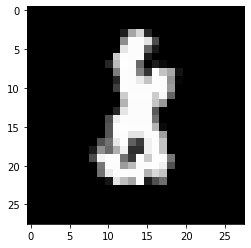

In [ ]:
img = img.view(64,28,28).to("cpu")

plt.imshow(img[4].detach().numpy(),cmap='gray')
n=0

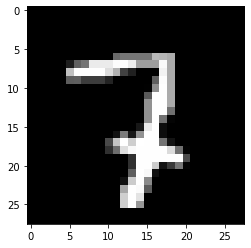

In [ ]:
n = n+1
plt.imshow(img[n].detach().numpy(),cmap='gray')